In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

sns.set_theme(context="talk", style="whitegrid", palette="colorblind")

In [2]:
stats = pd.read_csv(
    "data/shome2023notebook/stats.csv",
    header=None,
    names=["notebook", "num_cells"]
).reset_index(drop=True)
stats = stats.loc[stats["num_cells"] > 0].reset_index(drop=True)

def assign_size(value, p25, p75):
    """Assign size based on percentile thresholds of `num_cells`"""
    if value <= p25:
        return "small"
    elif value <= p75:
        return "medium"
    else:
        return "large"

# Calculate percentiles
p25 = stats['num_cells'].quantile(0.25)
p75 = stats['num_cells'].quantile(0.75)

# Create new bin column
stats['size'] = stats['num_cells'].apply(lambda x: assign_size(x, p25, p75))
stats

,notebook,num_cells,size
0,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium
1,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium
2,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium
3,data/assert_notebooks/JunchuanYu/Deep-learning...,8,small
4,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium
...,...,...,...
195175,data/quaranta2021kgtorrent/KT_dataset/lbroncha...,18,medium
195176,data/quaranta2021kgtorrent/KT_dataset/naomilin...,8,small
195177,data/quaranta2021kgtorrent/KT_dataset/octavios...,18,medium
195178,data/quaranta2021kgtorrent/KT_dataset/valcoder...,22,medium


In [3]:
asserts = pd.read_csv(
    "data/shome2023notebook/asserts.csv",
    header=None,
    names=["notebook", "assert"]
)
asserts

,notebook,assert
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss"
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra..."
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert test_acc <= 1 and test_acc > 0.7, test_acc"
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss"
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra..."
...,...,...
6,data/quaranta2021kgtorrent/KT_dataset/ashishpa...,assert shape[2] == 3
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.targetName) == str
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.colnames) == str
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert self.colnames in X.columns


In [18]:
prints = pd.read_csv(
    "data/shome2023notebook/prints.csv",
    header=None,
    names=["notebook", "print"]
)
prints

,notebook,print
15,data/assert_notebooks/JunchuanYu/Deep-learning...,"print('Epoch: ', epoch, '| Step: ', step, '|lo..."
15,data/assert_notebooks/JunchuanYu/Deep-learning...,"print(' |val_loss:', train_loss.item(), 'val_..."
15,data/assert_notebooks/JunchuanYu/Deep-learning...,print('save successfully!')
15,data/assert_notebooks/JunchuanYu/Deep-learning...,print('save successfully!')
13,data/assert_notebooks/JunchuanYu/Deep-learning...,"print('Epoch: ', epoch, '| Step: ', step, '|lo..."
...,...,...
12,data/quaranta2021kgtorrent/KT_dataset/beamers_...,"print('MAE:', score)"
4,data/quaranta2021kgtorrent/KT_dataset/kerneler...,"print(os.path.join(dirname, filename))"
7,data/quaranta2021kgtorrent/KT_dataset/kerneler...,print(f'No correlation plots shown: The number...
11,data/quaranta2021kgtorrent/KT_dataset/kerneler...,print(f'There are {nRow} rows and {nCol} colum...


In [19]:
lasts = pd.read_csv(
    "data/shome2023notebook/lasts.csv",
    header=None,
    names=["notebook", "last"]
)
lasts

,notebook,last
6,data/assert_notebooks/rohitashwachaks/MIS-382N...,"(X.sum(0, keepdim=True), X.sum(1, keepdim=True))"
10,data/assert_notebooks/rohitashwachaks/MIS-382N...,"(X_prob, X_prob.sum(1))"
14,data/assert_notebooks/rohitashwachaks/MIS-382N...,"y_hat[[0, 1], y]"
16,data/assert_notebooks/rohitashwachaks/MIS-382N...,"cross_entropy(y_hat, y)"
20,data/assert_notebooks/rohitashwachaks/MIS-382N...,"accuracy(y_hat, y) / len(y)"
...,...,...
10,data/quaranta2021kgtorrent/KT_dataset/talk2ran...,data.head()
11,data/quaranta2021kgtorrent/KT_dataset/talk2ran...,data.head()
12,data/quaranta2021kgtorrent/KT_dataset/talk2ran...,data.describe()
19,data/quaranta2021kgtorrent/KT_dataset/talk2ran...,"classifier.fit(X_train, y_train)"


# Analysis of stats

General statistics of our dataset.

In [5]:
stats.loc[:, ["num_cells", "size"]].describe(include="all")

,num_cells,size
count,195180.000000,195180
unique,NaN,3
top,NaN,medium
freq,NaN,94081
mean,21.213224,NaN
std,21.950015,NaN
min,1.000000,NaN
25%,8.000000,NaN
50%,15.000000,NaN
75%,26.000000,NaN


In [14]:
stats["size"].value_counts()

size
medium    94081
small     52433
large     48666
Name: count, dtype: int64

In [15]:
stats.loc[stats["size"] == "small", "num_cells"].describe()

count    52433.000000
mean         5.349684
std          1.699624
min          1.000000
25%          5.000000
50%          5.000000
75%          6.000000
max          8.000000
Name: num_cells, dtype: float64

In [16]:
stats.loc[stats["size"] == "medium", "num_cells"].describe()

count    94081.000000
mean        15.788948
std          4.949465
min          9.000000
25%         11.000000
50%         15.000000
75%         20.000000
max         26.000000
Name: num_cells, dtype: float64

In [17]:
stats.loc[stats["size"] == "large", "num_cells"].describe()

count    48666.000000
mean        48.790881
std         28.165931
min         27.000000
25%         32.000000
50%         40.000000
75%         55.000000
max        772.000000
Name: num_cells, dtype: float64

The distribution of the `num_cells` column is not even. There are also a lot of outliers due to which distribution visualizations look hideous. I have broken the data into 3 categories (`size` column) based on the 25^th^ and 75^th^ percentiles to make the visualizations easier to interpret.

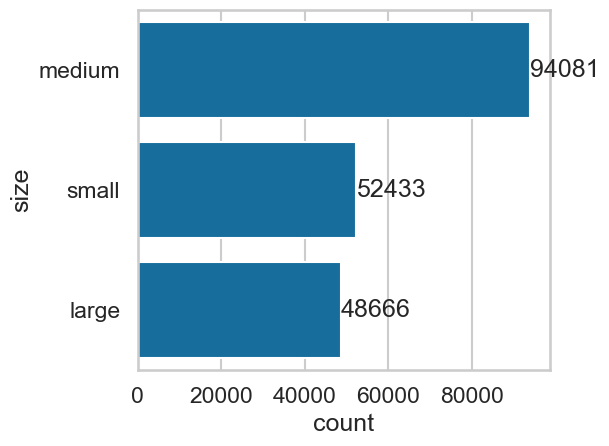

In [18]:
ax = sns.barplot(
    data=stats["size"].value_counts().sort_values(ascending=False),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig('report/notebook-size-distribution.pdf')

Here, I am visualizing the distribution of `num_cells` per size category which allows us to create nicer looking plots!

I am using boxen plot which provides more details compared to a histogram or a boxplot. The shade of color indicates density of the data. The height of the box shows the spread between the 25^th^ and 75^th^ percentile ranges. Width represents the variance within that range (wider boxes mean more variance). More boxes are drawn in the area of high data density.

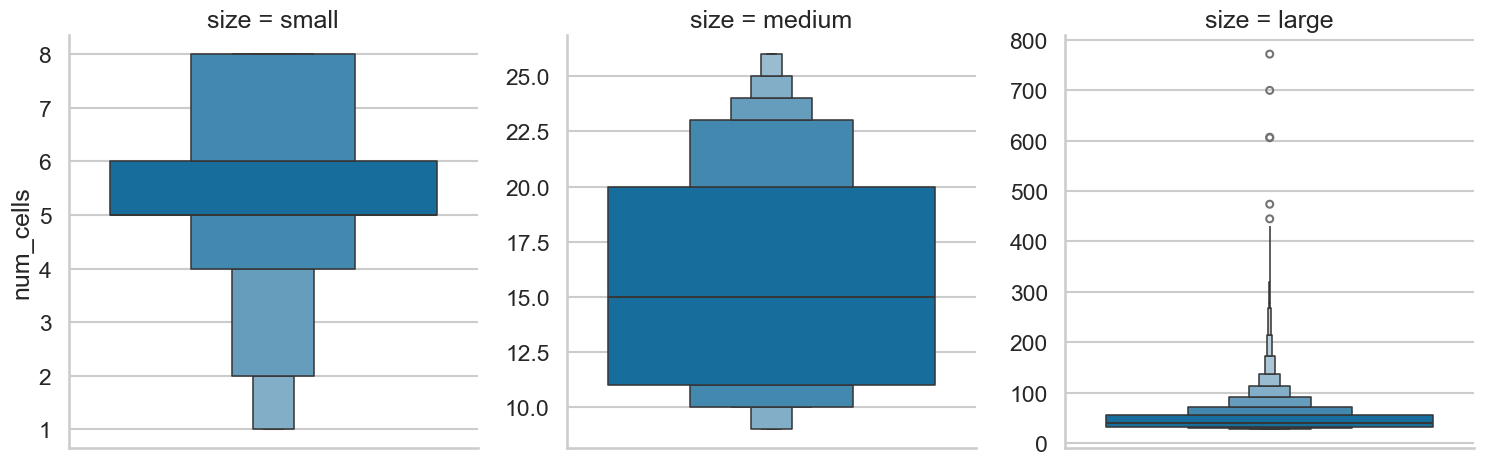

In [19]:
sns.catplot(
    data=stats,
    kind="boxen",
    col="size",
    y="num_cells",
    sharey=False,
    col_order=["small", "medium", "large"]
)
plt.tight_layout()
plt.savefig('report/cell-per-notebook-size-distribution.pdf')

## Distribution of feedback mechanisms across size of notebooks

In [20]:
notebook_asserts = asserts.groupby('notebook').size().reset_index(name='num_asserts')
stats = stats.merge(notebook_asserts, on='notebook', how='left')
stats['num_asserts'] = stats['num_asserts'].fillna(0)

notebook_prints = prints.groupby('notebook').size().reset_index(name='num_prints')
stats = stats.merge(notebook_prints, on='notebook', how='left')
stats['num_prints'] = stats['num_prints'].fillna(0)

notebook_lasts = lasts.groupby('notebook').size().reset_index(name='num_lasts')
stats = stats.merge(notebook_lasts, on='notebook', how='left')
stats['num_lasts'] = stats['num_lasts'].fillna(0)

stats

,notebook,num_cells,size,num_asserts,num_prints,num_lasts
0,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium,3.0,0.0,6.0
1,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium,3.0,0.0,6.0
2,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium,4.0,4.0,0.0
3,data/assert_notebooks/JunchuanYu/Deep-learning...,8,small,4.0,5.0,0.0
4,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium,4.0,4.0,0.0
...,...,...,...,...,...,...
195175,data/quaranta2021kgtorrent/KT_dataset/lbroncha...,18,medium,0.0,0.0,1.0
195176,data/quaranta2021kgtorrent/KT_dataset/naomilin...,8,small,0.0,1.0,6.0
195177,data/quaranta2021kgtorrent/KT_dataset/octavios...,18,medium,0.0,2.0,0.0
195178,data/quaranta2021kgtorrent/KT_dataset/valcoder...,22,medium,0.0,5.0,0.0


In [21]:
melted = stats.melt(
    id_vars=["notebook", "num_cells", "size"],
    value_vars=["num_asserts", "num_prints", "num_lasts"]
)
melted

,notebook,num_cells,size,variable,value
0,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium,num_asserts,3.0
1,data/assert_notebooks/rohitashwachaks/MIS-382N...,20,medium,num_asserts,3.0
2,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium,num_asserts,4.0
3,data/assert_notebooks/JunchuanYu/Deep-learning...,8,small,num_asserts,4.0
4,data/assert_notebooks/JunchuanYu/Deep-learning...,9,medium,num_asserts,4.0
...,...,...,...,...,...
585535,data/quaranta2021kgtorrent/KT_dataset/lbroncha...,18,medium,num_lasts,1.0
585536,data/quaranta2021kgtorrent/KT_dataset/naomilin...,8,small,num_lasts,6.0
585537,data/quaranta2021kgtorrent/KT_dataset/octavios...,18,medium,num_lasts,0.0
585538,data/quaranta2021kgtorrent/KT_dataset/valcoder...,22,medium,num_lasts,0.0


/Users/aru/phd/shome2023notebook/.venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


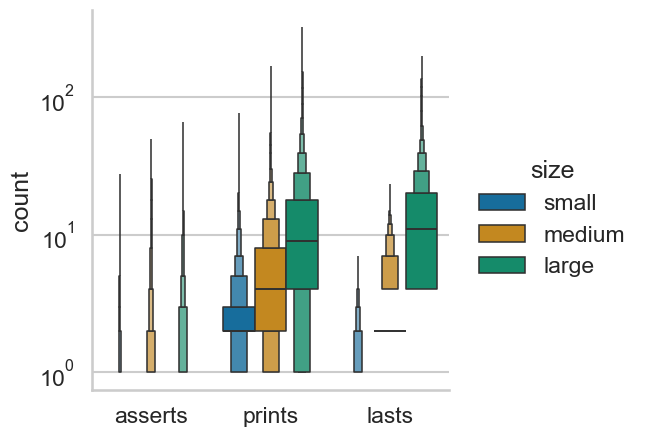

In [22]:
g = sns.catplot(
    data=melted,
    x="variable",
    y="value",
    hue="size",
    kind="boxen",
    log_scale=True,
    hue_order=["small", "medium", "large"]
)
g.tight_layout()
g.set_xticklabels(["asserts", "prints", "lasts"])
g.set_axis_labels("", "count")
plt.savefig('report/fms-per-notebook-size-distribution.pdf')

**NOTE** I experimented with several versions of a distribution plot (such as a histogram). However, the data is so large and skewed that the visualizations all look terrible.

# Analysis of assertions

## How many notebooks with vs. without at least one assertion?

In [23]:
asserts.drop_duplicates(subset=["notebook"]).shape

(25116, 2)

In [24]:
!grep '^INPUT' logs/data-collection.log |wc -l

  297851


We analysed a total of 298K notebooks, 25K (8.5%) of which have at least one assertion.

## External testing method vs. built-in `assert`

In [4]:
class NodeCollector(ast.NodeVisitor):
    def __init__(self):
        self.node = None

    def visit_Assert(self, node: ast.Assert) -> None:
        self.node = node

    def visit_Call(self, node: ast.Call) -> None:
        self.node = node

def get_node(tree):
    collector = NodeCollector()
    collector.visit(tree)
    return collector.node

asserts.loc[:, "node"] = asserts.loc[:, "assert"].apply(lambda x: ast.parse(x))
asserts.loc[:, "node"] = asserts.loc[:, "node"].apply(get_node)
asserts

,notebook,assert,node
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss",<ast.Assert object at 0x1412f5610>
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra...",<ast.Assert object at 0x14688c590>
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert test_acc <= 1 and test_acc > 0.7, test_acc",<ast.Assert object at 0x14688c9d0>
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_loss < 0.5, train_loss",<ast.Assert object at 0x14688ccd0>
32,data/assert_notebooks/rohitashwachaks/MIS-382N...,"assert train_acc <= 1 and train_acc > 0.7, tra...",<ast.Assert object at 0x14688d810>
...,...,...,...
6,data/quaranta2021kgtorrent/KT_dataset/ashishpa...,assert shape[2] == 3,<ast.Assert object at 0x17d714f50>
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.targetName) == str,<ast.Assert object at 0x17d7153d0>
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert type(self.colnames) == str,<ast.Assert object at 0x17d715950>
16,data/quaranta2021kgtorrent/KT_dataset/aryansha...,assert self.colnames in X.columns,<ast.Assert object at 0x17d715ed0>


In [26]:
asserts.loc[asserts["node"].map(lambda x: not isinstance(x, ast.Assert))].shape

(4477, 3)

In [27]:
asserts.loc[asserts["node"].map(lambda x: isinstance(x, ast.Assert))].shape

(85129, 3)

We collected a total of 89.6K assertions from the 25K notebooks.

5% of the assertions are written using external testing methods, while majority of the assertions (95%) are written using the built-in `assert` statement.

## Do asserts have a failure message?

In [28]:
msgs = asserts.loc[asserts["node"].map(lambda x: isinstance(x, ast.Assert)), "node"]
msgs = msgs.apply(lambda x: x.msg).dropna()
msgs.shape

(28403,)

In [5]:
asserts = asserts.drop_duplicates(subset=["assert"])
asserts.shape

(27115, 3)

In [30]:
class FunctionNameCollector(ast.NodeVisitor):
    def __init__(self):
        self.names = []

    def visit_Name(self, node: ast.Name) -> None:
        self.names.append(node.id)

    def visit_Attribute(self, node: ast.Attribute) -> None:
        self.names.append(node.attr)

collector = FunctionNameCollector()
for _, node in asserts.loc[asserts["node"].map(lambda x: isinstance(x, ast.Call)), "node"].items():
    collector.visit(node.func)

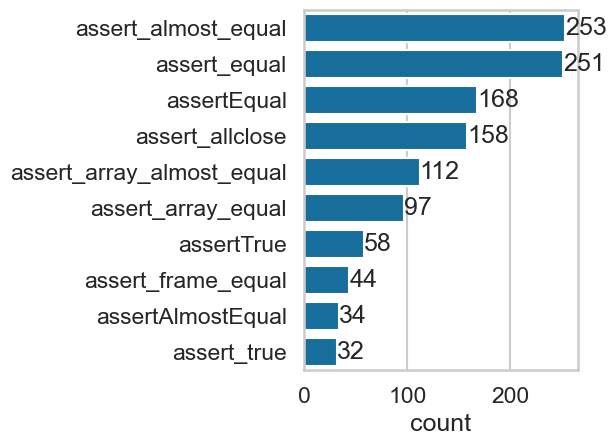

In [31]:
names = pd.Series(data=collector.names)
ax = sns.barplot(
    data=names.value_counts().sort_values(ascending=False).head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig('report/other-test-methods.pdf')

## Most common `Assert.test`?

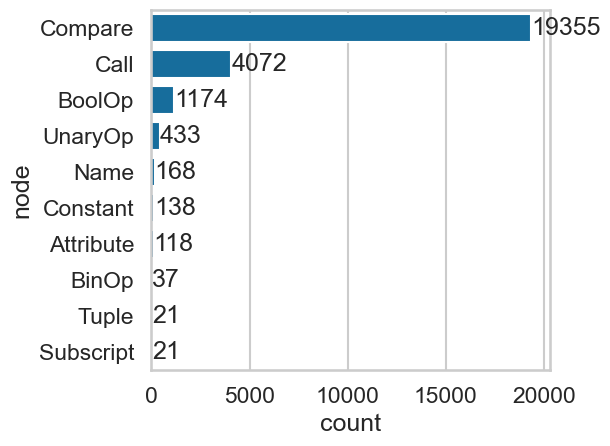

In [32]:
tests = asserts.loc[asserts["node"].map(lambda x: isinstance(x, ast.Assert)), "node"]
tests = tests.apply(lambda x: x.test)
ax = sns.barplot(
    data=tests.apply(lambda x: x.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h",
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-assert-test.pdf")

## Most common `Compare.ops`?

In [33]:
compares = tests.loc[tests.map(lambda x: isinstance(x, ast.Compare))]
compares

32     <ast.Compare object at 0x1799b3390>
6      <ast.Compare object at 0x1799d29d0>
6      <ast.Compare object at 0x179734150>
14     <ast.Compare object at 0x17990e5d0>
100    <ast.Compare object at 0x17992db90>
                      ...                 
42     <ast.Compare object at 0x3203c9990>
11     <ast.Compare object at 0x3203d2110>
19     <ast.Compare object at 0x3203d89d0>
19     <ast.Compare object at 0x3203d92d0>
9      <ast.Compare object at 0x3203d9a90>
Name: node, Length: 19355, dtype: object

In [34]:
compares.sample(5).map(lambda x: ast.unparse(x))

38                       conditional.shape == (3873, 4)
45    round(f_tEqualsOne, 12) == round(computedPredi...
7                                   kappa == kappa_true
11             prediction.shape[-2:] == zero_data.shape
6                                     sz == target_size
Name: node, dtype: object

In [35]:
tests.loc[tests.map(lambda x: isinstance(x, ast.Call))].sample(5).map(lambda x: ast.unparse(x))

11    np.isclose(metric(y_test, model_2.predict(X_te...
39                  np.all(X.columns == X_test.columns)
25               isinstance(optimizer, torch.optim.SGD)
23                       isinstance(model_lr, Pipeline)
63    features_created.rent_per_room.equals(features...
Name: node, dtype: object

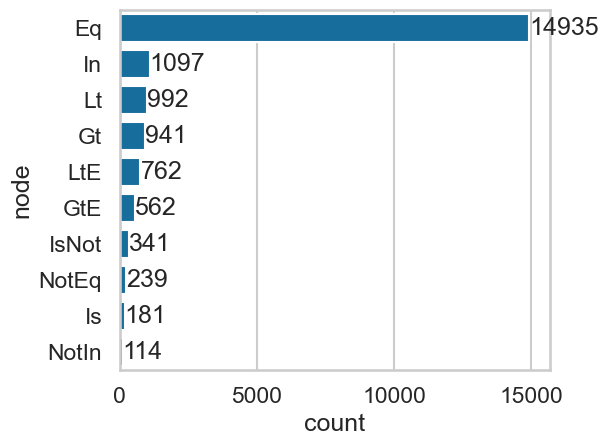

In [36]:
ops = compares.apply(lambda x: x.ops).explode()
ax = sns.barplot(
    data=ops.apply(lambda x: x.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h",
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-compare-op.pdf")

## Top keywords in LHS vs. RHS?

TODO: merge LHS and RHS, analyse together (`x == 5` not different from `5 == x`)

In [37]:
lhs = compares.apply(lambda x: x.left)
lhs = lhs.apply(lambda x: ast.unparse(x))
lhs

32                                            train_loss
6                                                 stride
6                                        input_size % 32
14                                        gt_image.shape
100                                 key_rearranged.shape
                             ...                        
42                                       len(encounters)
11                               image_array_input.dtype
19                   mean_absolute_error(y_true, y_pred)
19     mean_absolute_error(y_true, y_pred, sample_wei...
9                                        X_test.shape[0]
Name: node, Length: 19355, dtype: object

In [38]:
vectorizer = CountVectorizer(
    stop_words=None,
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(lhs)
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

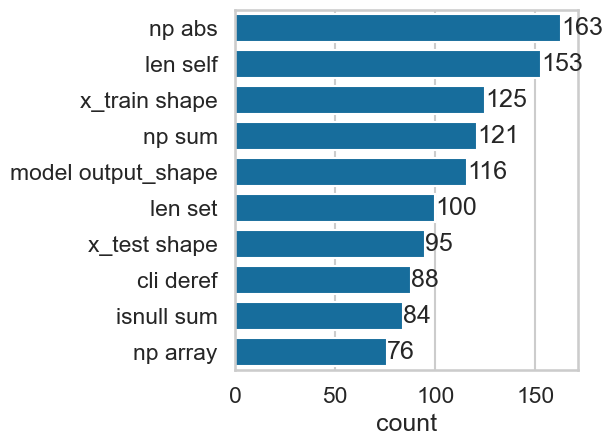

In [39]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-compare-lhs.pdf")

In [40]:
rhs = compares.apply(lambda x: x.comparators).explode()
rhs = rhs.apply(lambda x: ast.unparse(x))
rhs

32                       0.5
6                     [1, 2]
6                          0
14           pre_image.shape
100     key_transposed.shape
               ...          
42                 len(race)
11                  np.uint8
19                         2
19                   44 / 14
9      id_test.shape[0] // 3
Name: node, Length: 20164, dtype: object

In [41]:
vectorizer = CountVectorizer(
    stop_words=None,
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(rhs)
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

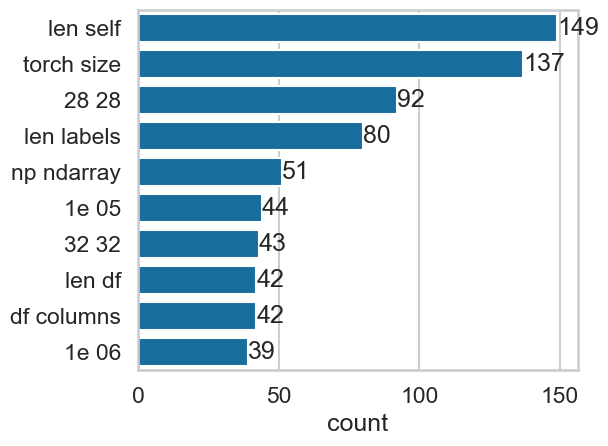

In [42]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-compare-rhs.pdf")

## What are the top keywords in the failure messages?

In [43]:
msgs = msgs.apply(lambda x: ast.unparse(x))
msgs = msgs.drop_duplicates()
msgs.shape

(5875,)

In [44]:
vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(msgs)
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

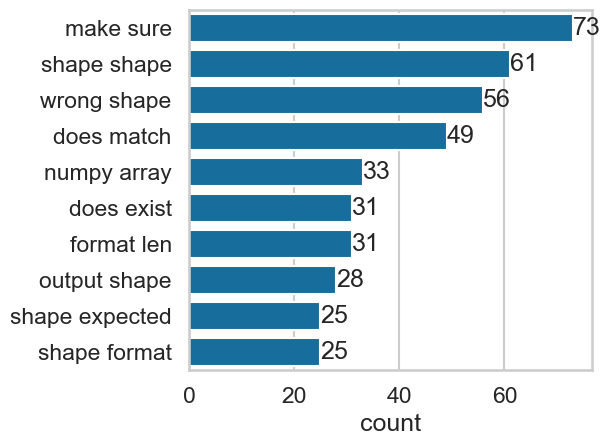

In [45]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-assert-msgs.pdf")

# Analysis of `print` statements

## How many notebooks with vs. without at least one print?

In [13]:
prints.drop_duplicates(subset=["notebook"]).shape

(180520, 2)

61% notebooks contain at least one print statement. Compared to assertions, print statements are considerable larger.

In [23]:
prints = prints.drop_duplicates(subset=["print"])
prints.shape

(498322, 2)

In [24]:
prints.loc[:, "node"] = prints.loc[:, "print"].map(lambda x: ast.parse(x))

/var/folders/72/dkwg1j016fqf0st2qg2_56740000gn/T/ipykernel_52127/2930081002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prints.loc[:, "node"] = prints.loc[:, "print"].map(lambda x: ast.parse(x))


## Top node inside print statements?

In [49]:
class ArgsCollector(ast.NodeVisitor):
    def __init__(self):
        self.args = None

    def visit_Call(self, node: ast.Call):
        if isinstance(node.func, ast.Name) and node.func.id == "print":
            self.args = node.args

def get_args(node):
    collector = ArgsCollector()
    collector.visit(node)
    return collector.args

args = prints.loc[:, "node"].map(get_args)
args = args.explode()
args = args.loc[args.notna()]
args

15     <ast.Constant object at 0x31d9730d0>
15         <ast.Name object at 0x31d970b10>
15     <ast.Constant object at 0x31d67dc90>
15         <ast.Name object at 0x31d900650>
15     <ast.Constant object at 0x31d9007d0>
                      ...                  
59    <ast.Subscript object at 0x38b651f50>
5      <ast.Constant object at 0x38b652a10>
5          <ast.Call object at 0x38b652990>
5      <ast.Constant object at 0x38b652750>
5          <ast.Call object at 0x38b6526d0>
Name: node, Length: 716088, dtype: object

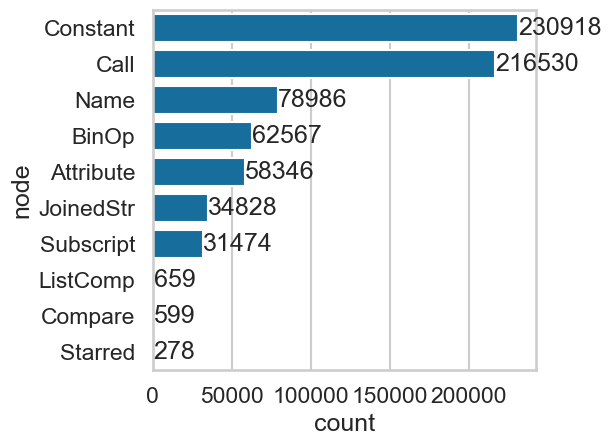

In [50]:
ax = sns.barplot(
    data=args.map(lambda x: x.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-print-nodes.pdf")

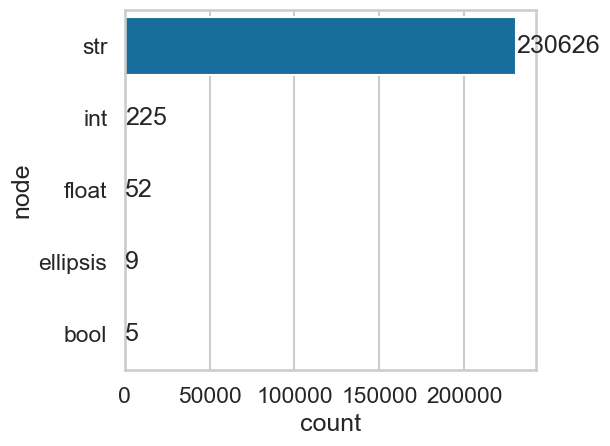

In [51]:
ax = sns.barplot(
    data=args.loc[args.map(lambda x: isinstance(x, ast.Constant))]
    .map(lambda x: x.value.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-print-constant-types.pdf")

## Top keywords in prints?

In [52]:
class ConstantCollector(ast.NodeVisitor):
    def __init__(self):
        self.constants = []

    def visit_Constant(self, node: ast.Constant):
        if isinstance(node.value, str):
            self.constants.append(node)

collector = ConstantCollector()
prints.loc[:, "node"].map(lambda x: collector.visit(x))

constants = pd.Series(data=collector.constants)
constants = constants.map(lambda x: ast.unparse(x))
constants

0              'Epoch: '
1             '| Step: '
2               '|loss:'
3                '|acc:'
4         '  |val_loss:'
               ...      
512641             'Age'
512642        'Embarked'
512643           'Cabin'
512644         'train: '
512645       '\n test: '
Length: 512646, dtype: object

In [53]:
constants.shape

(512646,)

In [54]:
vectorizer = CountVectorizer(
    stop_words="english",
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(constants.sample(44568)) # 99.999% CL, 1% error
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

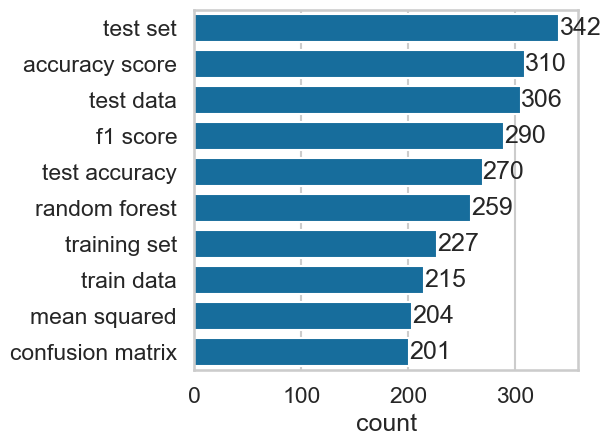

In [55]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-print-constants.pdf")

In [56]:
class ConstantRemover(ast.NodeTransformer):
    def visit_Constant(self, node: ast.Constant):
        if isinstance(node, str):
            return ""

In [57]:
def unparse(node):
    try:
        new = ast.unparse(node)
    except AttributeError:
        new = None
    finally:
        return new

transformer = ConstantRemover()
code = prints.loc[:, "node"].map(lambda x: ast.fix_missing_locations(transformer.visit(x)))
code = code.map(unparse)
code = code.loc[code.notna()]
code

15    print(epoch, step, train_loss.item(), acc)
15                 print(train_loss.item(), acc)
15                                       print()
13        print(f'{epoch}{loss / n}{loss_ / n}')
2                        print(f'{label.shape}')
                         ...                    
34                         print(f'{score:}{n}')
34                         print(f'{score:}{n}')
35                         print(f'{score:}{n}')
35                         print(f'{score:}{n}')
5                   print(len(train), len(test))
Name: node, Length: 308544, dtype: object

In [58]:
vectorizer = CountVectorizer(
    stop_words=["print"],
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(code.sample(43103)) # 99.999% CL, 1% error
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

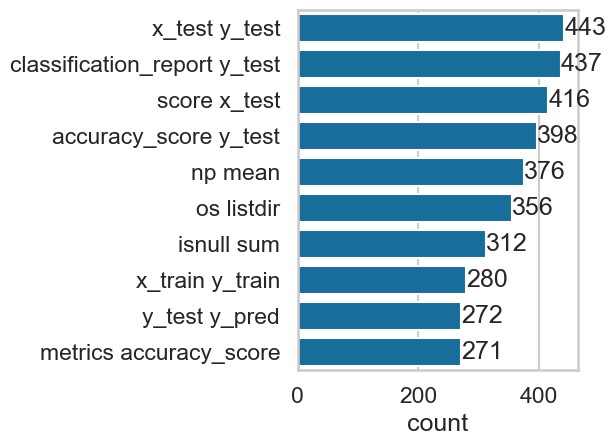

In [59]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-print-not-constants.pdf")

# Analysis of Last statements

## How many notebooks with vs. without at least one last statement?

In [60]:
lasts.drop_duplicates(subset=["notebook"]).shape

(119106, 2)

40% notebooks contain at least one last statement.

In [25]:
lasts = lasts.drop_duplicates(subset=["last"])
lasts = lasts.loc[lasts["last"].notna()]
lasts.shape

(373606, 2)

In [26]:
lasts.loc[:, "node"] = lasts.loc[:, "last"].map(lambda x: ast.parse(x))

## Most common nodes in last statements?

In [63]:
class NodeCollector(ast.NodeVisitor):
    def __init__(self):
        self.nodes = []

    def visit_Expr(self, node: ast.Expr):
        self.nodes.append(node.value)

collector = NodeCollector()
lasts.loc[:, "node"].map(lambda x: collector.visit(x))
nodes = pd.Series(data=collector.nodes)

In [64]:
nodes.shape

(373506,)

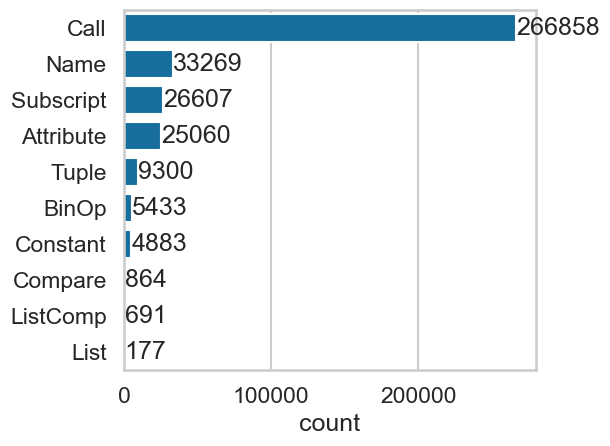

In [65]:
ax = sns.barplot(
    nodes.map(lambda x: x.__class__.__name__)
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient='h'
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-nodes.pdf")

## Most common modules used in last statements?

In [66]:
class NameCollector(ast.NodeVisitor):
    def __init__(self):
        self.name = None
        self.stack = []

    def visit_Name(self, node: ast.Name):
        if self.stack:
            self.name = (node.id, self.stack[0].attr)
        else:
            self.name = (None, node.id)

    def visit_Attribute(self, node: ast.Attribute):
        self.stack.append(node)
        self.visit(node.value)
    
    def visit_Call(self, node: ast.Call):
        self.visit(node.func)

def get_names(node):
    collector = NameCollector()
    collector.visit(node)
    return collector.name

names = pd.DataFrame(data=nodes.map(get_names).tolist(), columns=["module", "function"])
names.shape


(373506, 2)

In [67]:
names.value_counts()

module    function 
sns       countplot    7415
plt       title        6024
sns       heatmap      5518
          boxplot      4697
          distplot     4625
                       ... 
df_val    DecodeIds       1
df_vaild  head            1
df_vader  head            1
          describe        1
λ         max             1
Name: count, Length: 101283, dtype: int64

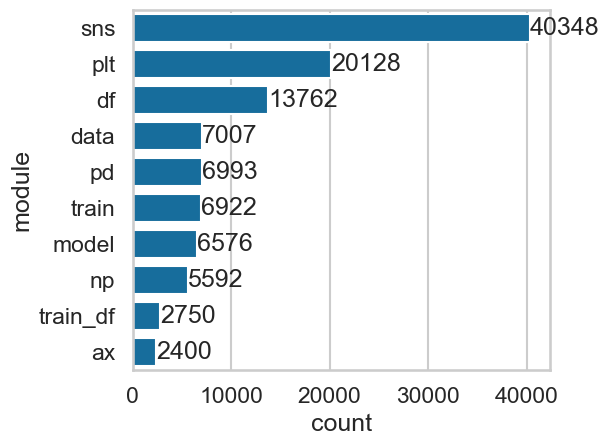

In [68]:
ax = sns.barplot(
    data=names["module"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-modules.pdf")

## Most common functions used in last statements?

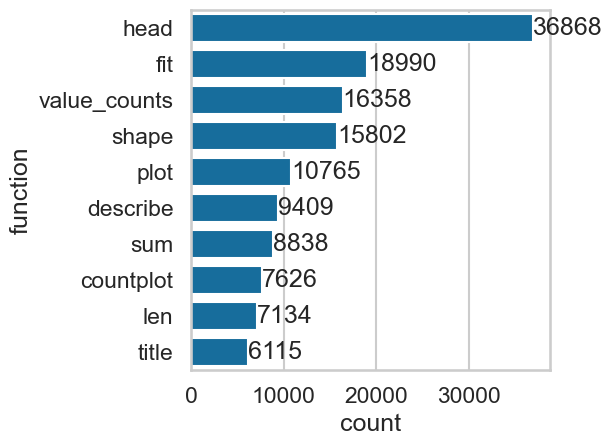

In [69]:
ax = sns.barplot(
    data=names["function"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-functions.pdf")

## Most common function called on data frames?

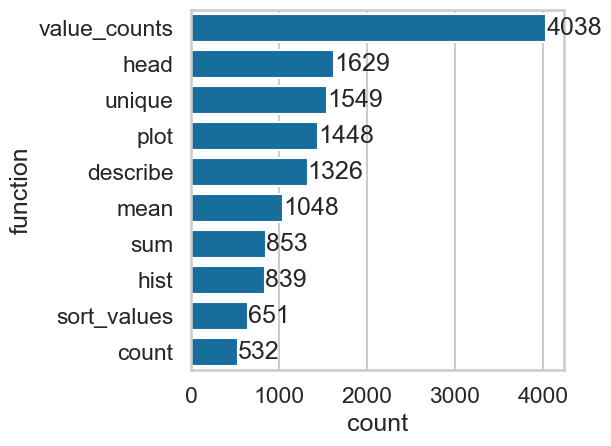

In [70]:
ax = sns.barplot(
    data=names.loc[names["module"].map(lambda x: x in ["data", "df"])].loc[:, "function"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-df-functions.pdf")

## Most common visualisations used?

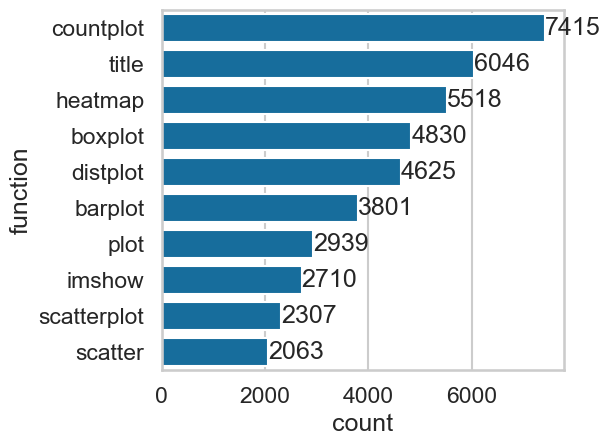

: 

In [ ]:
ax = sns.barplot(
    data=names.loc[names["module"].map(lambda x: x in ["sns", "plt"])].loc[:, "function"]
    .value_counts()
    .sort_values(ascending=False)
    .head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-visualisation-functions.pdf")

## Top keywords in last statements?

In [ ]:
vectorizer = CountVectorizer(
    stop_words=None,
    ngram_range=(2,2),
)
X = vectorizer.fit_transform(nodes.sample(43195).map(lambda x: ast.unparse(x)))
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

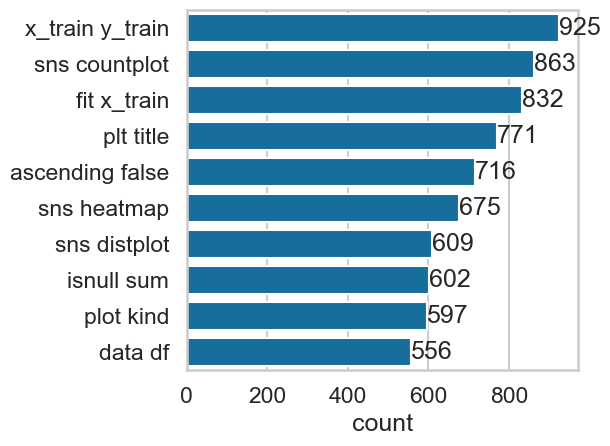

In [ ]:
ax = sns.barplot(
    data=counts["count"].head(10),
    orient="h"
)
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig("report/common-last-keywords.pdf")

# Case Study Data Preparation

In [6]:
vectorizer = TfidfVectorizer(
    stop_words=["assert"],
)
X = vectorizer.fit_transform(asserts["assert"])
occurances = pd.DataFrame(
    data={"freq": X.toarray().max(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
occurances = occurances.sort_values(by=["freq"], ascending=False)

In [28]:
occurances.head(10)

,freq
batch_size,1.0
good_perc,1.0
is_contiguous,1.0
23,1.0
n_up,1.0
x_idx,1.0
from,1.0
expected_model_path,1.0
loss,1.0
mais_proximo,1.0


In [29]:
occurances.describe()

,freq
count,24249.000000
mean,0.600057
std,0.199959
min,0.023327
25%,0.450598
50%,0.608176
75%,0.725244
max,1.000000


In [7]:
asserts.loc[:, "tokens"] = asserts.loc[:, "assert"].apply(vectorizer.build_analyzer())
asserts.loc[:, "sum_freq"] = X.toarray().sum(axis=1) # sum all columns to get TF-IDF of all tokens in each asser
asserts.loc[:, "max_freq"] = X.toarray().max(axis=1) # luis: take max TF-IDF of all tokens in assert
asserts = asserts.loc[asserts["tokens"].map(lambda x: True if x else False)] # remove asserts without any tokens

/var/folders/72/dkwg1j016fqf0st2qg2_56740000gn/T/ipykernel_63020/11873473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asserts.loc[:, "tokens"] = asserts.loc[:, "assert"].apply(vectorizer.build_analyzer())
/var/folders/72/dkwg1j016fqf0st2qg2_56740000gn/T/ipykernel_63020/11873473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asserts.loc[:, "sum_freq"] = X.toarray().sum(axis=1) # sum all columns to get TF-IDF of all tokens in each asser
/var/folders/72/dkwg1j016fqf0st2qg2_56740000gn/T/ipykernel_6

In [8]:
asserts.sort_values(by=["sum_freq"], ascending=False)

,notebook,assert,node,tokens,sum_freq,max_freq
12,data/assert_notebooks/hwhv66/CourseworkDurham/...,"assert np.isclose(forwardPass(xin, w), np.arra...",<ast.Assert object at 0x16b127f50>,"[np, isclose, forwardpass, xin, np, array, 825...",8.657036,0.117220
26,data/quaranta2021kgtorrent/KT_dataset/alishera...,"assert sorted(bow_vocabulary)[::200] == ['!', ...",<ast.Assert object at 0x17b767f50>,"[sorted, bow_vocabulary, 200, 12500, 270, 700,...",7.121777,0.142901
24,data/quaranta2021kgtorrent/KT_dataset/rox1234_...,"assert sorted(bow)[::200] == ['!', '12500', '2...",<ast.Assert object at 0x17ce37f50>,"[sorted, bow, 200, 12500, 270, 700, by, gh, mi...",7.121201,0.143018
33,data/assert_notebooks/guandai/recommendation-w...,"assert set(get_article_names(['1024.0', '1176....",<ast.Assert object at 0x142db3f50>,"[set, get_article_names, 1024, 1176, 1305, 131...",6.942457,0.259621
37,data/assert_notebooks/kudojp/IBMRecommendation...,"assert set(get_article_names([1024, 1176, 1305...",<ast.Assert object at 0x16ca27790>,"[set, get_article_names, 1024, 1176, 1305, 131...",6.942457,0.259621
...,...,...,...,...,...,...
13,data/assert_notebooks/alonweissfeld/machine-le...,assert 0.0 <= mean_accuracy <= 1.0,<ast.Assert object at 0x15ebdf590>,[mean_accuracy],1.000000,1.000000
12,data/assert_notebooks/alpkaancelik/AI-Nanodegr...,"assert X.shape == (6, 2)",<ast.Assert object at 0x15ebfff50>,[shape],1.000000,1.000000
11,data/assert_notebooks/altdeep/probmodeler/proj...,assert a > 0 and a < 1,<ast.Assert object at 0x15ec11790>,[and],1.000000,1.000000
2,data/assert_notebooks/alxhrzg/FromScratch/Gaus...,assert X.shape[0] > 1,<ast.Assert object at 0x15ec26890>,[shape],1.000000,1.000000


In [32]:
asserts.loc[:, "bin"] = pd.qcut(asserts.loc[:, "sum_freq"], 4, labels=False)
asserts["bin"].value_counts()

bin
0    6740
3    6740
1    6739
2    6739
Name: count, dtype: int64

In [35]:
merged = asserts.merge(
    stats, on="notebook", how="left"
).loc[:, ["sum_freq", "num_cells"]]

merged

,sum_freq,num_cells
0,1.000000,20
1,1.136862,20
2,1.145224,20
3,1.000000,9
4,1.329792,9
...,...,...
26953,1.883106,17
26954,1.840328,17
26955,1.702439,128
26956,2.604634,128


In [36]:
merged.corr()

,sum_freq,num_cells
sum_freq,1.000000,-0.022294
num_cells,-0.022294,1.000000


As expected, the sum of TF-IDF is not correlated with size of notebook. Why would it be?

In [140]:
for idx in asserts["bin"].unique():
    asserts.loc[asserts["bin"] == idx].sample(100, random_state=42).to_csv(f"data/shome2023notebook/quartile-{idx}.csv")

# Outputs

In [32]:
github = pd.read_csv(
    "data/shome2023notebook/kaggle-outputs.csv",
    header=None,
    names=["notebook", "source", "output_type", "text", "has_image", "has_html"],
    usecols=lambda x: x in ["notebook", "output_type"],
)
github

KeyboardInterrupt: 

# Print outputs

In [3]:
prints = pd.read_csv(
    "data/shome2023notebook/output-prints.csv",
    index_col=0,
)
prints

,notebook,print,text,source
38,data/assert_notebooks/declanvk/data301-project...,"print(accuracy_score(ytest, gaussian_ypredict))",0.742537313433\n,"print(accuracy_score(ytest, gaussian_ypredict))"
43,data/assert_notebooks/declanvk/data301-project...,"print(accuracy_score(ytest, youtput))",0.817164179104\n,youtput = rforest_model.predict(Xtest)\n\nprin...
47,data/assert_notebooks/declanvk/data301-project...,"print(val_scores.mean(), val_scores.std())",0.82386618999 0.0445362753371\n,"print(val_scores.mean(), val_scores.std())"
2,data/assert_notebooks/0lidaxiang/dp-predict-st...,"print('Rows of dataset=%d, training set rows=%...","Rows of dataset=946, training set rows=757, te...",# Read pickle and split training and testing s...
5,data/assert_notebooks/0lidaxiang/dp-predict-st...,"print(X_train.shape, Y_train.shape)","(757, 20) (757,)\n",# Create training inputs\n# print(type(train_d...
...,...,...,...,...
16,data/quaranta2021kgtorrent/KT_dataset/vladzern...,print(any(data_test['Fare'].isnull())),False\nFalse\nTrue\nFalse\nFalse\nTrue\nFalse\n,print(any(data_test['Pclass'].isnull()))\nprin...
16,data/quaranta2021kgtorrent/KT_dataset/vladzern...,print(any(data_test['Embarked'].isnull())),False\nFalse\nTrue\nFalse\nFalse\nTrue\nFalse\n,print(any(data_test['Pclass'].isnull()))\nprin...
20,data/quaranta2021kgtorrent/KT_dataset/vladzern...,"print(metrics.classification_report(ypred, yte...",precision recall f1-score ...,ypred = model.predict(Xtest)\nfrom sklearn imp...
30,data/quaranta2021kgtorrent/KT_dataset/gauravdu...,print(text_representation),|--- feature_0 <= 54.50\n| |--- feature_1 <=...,\nfrom sklearn import tree\ntext_representatio...


In [4]:
vectorizer = CountVectorizer(
    stop_words=["print"],
)
X = vectorizer.fit_transform(prints["print"])
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

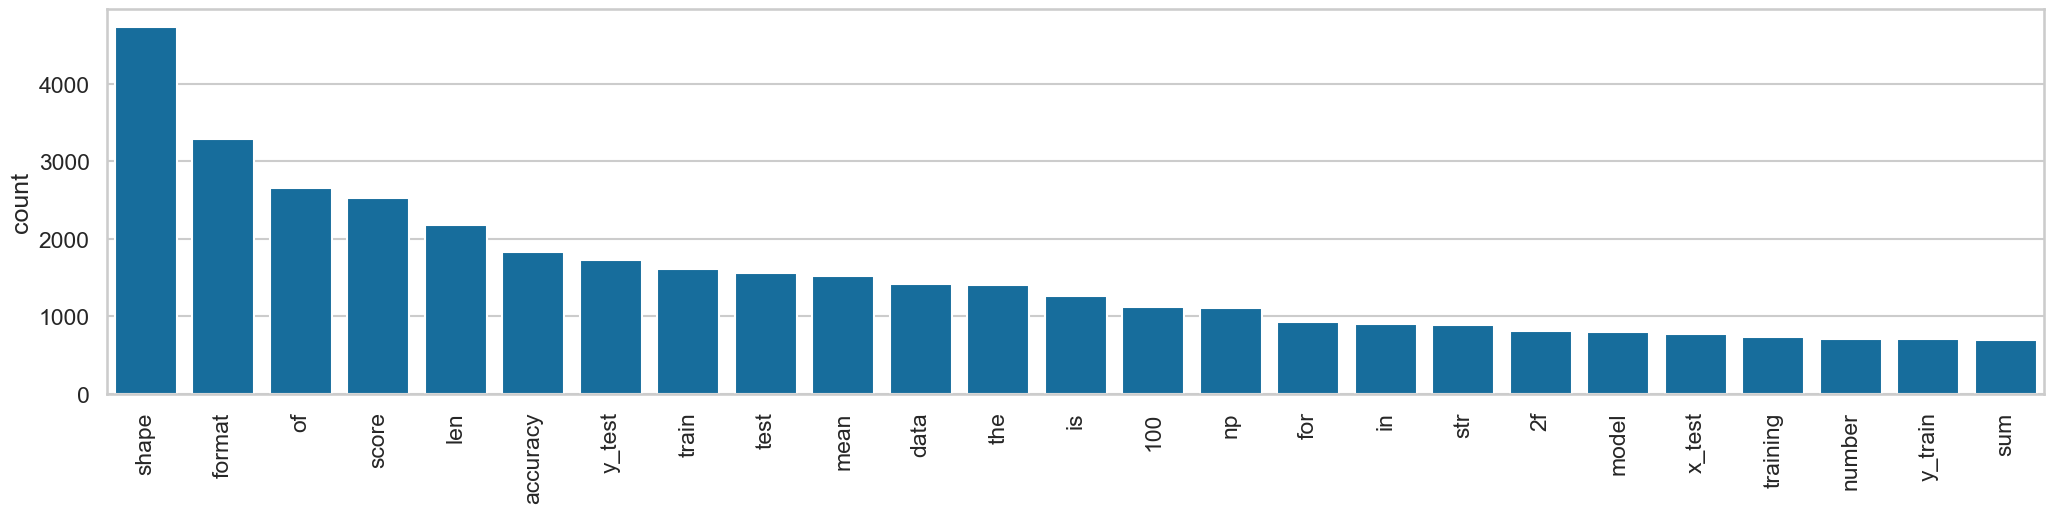

In [5]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(
    data=counts["count"].head(25),
    ax=ax,
)
ax.tick_params(axis='x', rotation=90)

In [6]:
vectorizer = TfidfVectorizer(
    stop_words=["print"],
)
X = vectorizer.fit_transform(prints["print"])
occurances = pd.DataFrame(
    data={"freq": X.toarray().max(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
occurances = occurances.sort_values(by=["freq"], ascending=False)

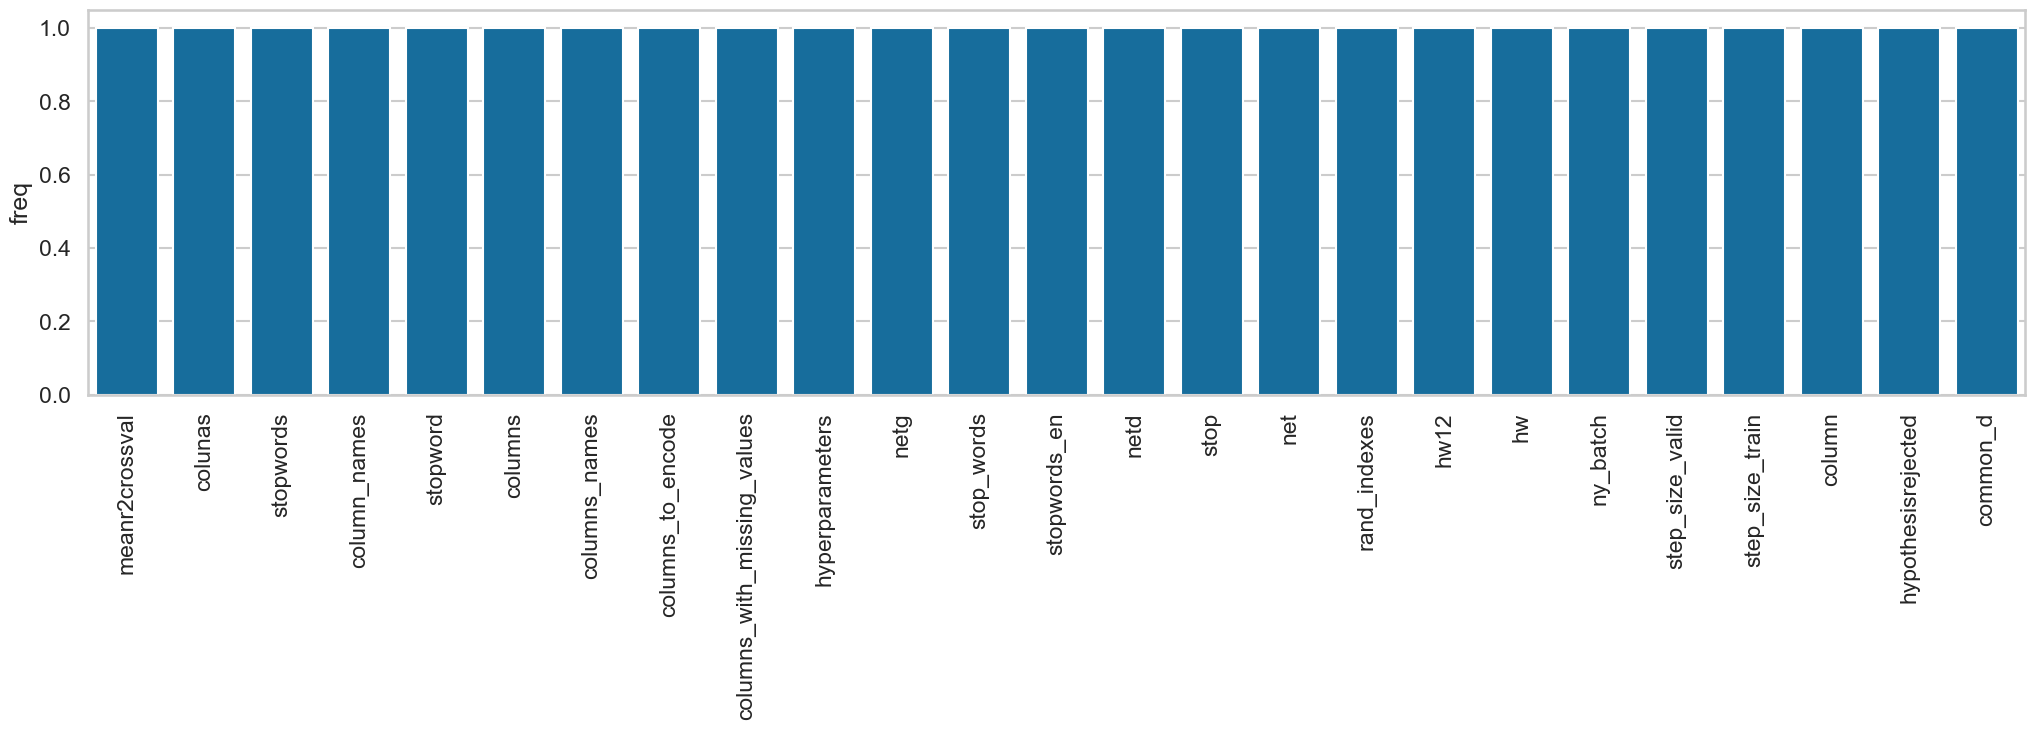

In [7]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(
    data=occurances["freq"].head(25),
    ax=ax,
)
ax.tick_params(axis='x', rotation=90)

In [8]:
prints.loc[:, "tokens"] = prints.loc[:, "print"].apply(vectorizer.build_analyzer())
prints.loc[:, "sum_freq"] = X.toarray().sum(axis=1) # sum all columns to get TF-IDF of all tokens in each asser
prints.loc[:, "max_freq"] = X.toarray().max(axis=1) # luis: take max TF-IDF of all tokens in assert
prints = prints.loc[prints["tokens"].map(lambda x: True if x else False)] # remove asserts without any tokens

In [10]:
prints.loc[:, "bin"] = pd.qcut(prints["sum_freq"], 4, labels=False)
prints["bin"].value_counts()

/var/folders/3_/dh2k952n2rld3_w3r369mln80000gn/T/ipykernel_36562/2468383750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prints.loc[:, "bin"] = pd.qcut(prints["sum_freq"], 4, labels=False)


bin
0    6254
3    6254
1    6253
2    6253
Name: count, dtype: int64

In [11]:
for idx in prints["bin"].unique():
    prints.loc[prints["bin"] == idx].sample(100, random_state=42).to_csv(f"data/shome2023notebook/prints-quartile-{idx}.csv")

In [6]:
import pandas as pd
files = !find data/shome2023notebook -type f -name 'prints-quartile-*.csv' -or -name 'texts-quartile-*.csv'
frames = []
for file in files:
    frames.append(pd.read_csv(file, index_col=0, usecols=["notebook"]))
notebooks = pd.concat(frames)
notebooks.to_csv("data/shome2023notebook/output-notebooks.txt", sep="\t", header=None)

# Text outputs

In [19]:
texts = pd.read_csv(
    "data/shome2023notebook/output-texts.csv",
    index_col=0,
).dropna()
texts

,notebook,last_node,text,source
6,data/assert_notebooks/declanvk/data301-project...,raw_data.head(),survived pclass sex age sibsp parc...,raw_data.head()
21,data/assert_notebooks/declanvk/data301-project...,X.head(),pclass age sibsp parch fare alone ...,X.head()
41,data/assert_notebooks/declanvk/data301-project...,"rforest_model.fit(Xtrain, ytrain)","RandomForestClassifier(bootstrap=True, class_w...",from sklearn.ensemble import RandomForestClass...
49,data/assert_notebooks/declanvk/data301-project...,plt.ylabel('predicted label'),<matplotlib.figure.Figure at 0x7f4cae8878d0>,from sklearn.metrics import confusion_matrix\n...
51,data/assert_notebooks/declanvk/data301-project...,"feature_importance.sort_values('importance', a...",feature importance\n7 male ...,feature_importance = pd.DataFrame({'feature': ...
...,...,...,...,...
38,data/quaranta2021kgtorrent/KT_dataset/gauravdu...,"confusion_matrix(y_train, y_train_pred)","array([[69, 18],\n [26, 49]])","print(accuracy_score(y_train, y_train_pred))\n..."
23,data/quaranta2021kgtorrent/KT_dataset/nataliam...,"c_w_train = dict(zip(range(4), c_w))",<Figure size 576x576 with 1 Axes>,c_w = get_class_weights(y_train)\nplot_class_w...
24,data/quaranta2021kgtorrent/KT_dataset/nataliam...,"plot_class_weights(get_class_weights(y_val), t...",<Figure size 576x576 with 1 Axes>,"plot_class_weights(get_class_weights(y_val),ti..."
31,data/quaranta2021kgtorrent/KT_dataset/nataliam...,vizualize_history(hist),<Figure size 576x576 with 1 Axes>,vizualize_history(hist)


In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts["last_node"])
counts = pd.DataFrame(
    data={"count": X.toarray().sum(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
counts = counts.sort_values(by=["count"], ascending=False)

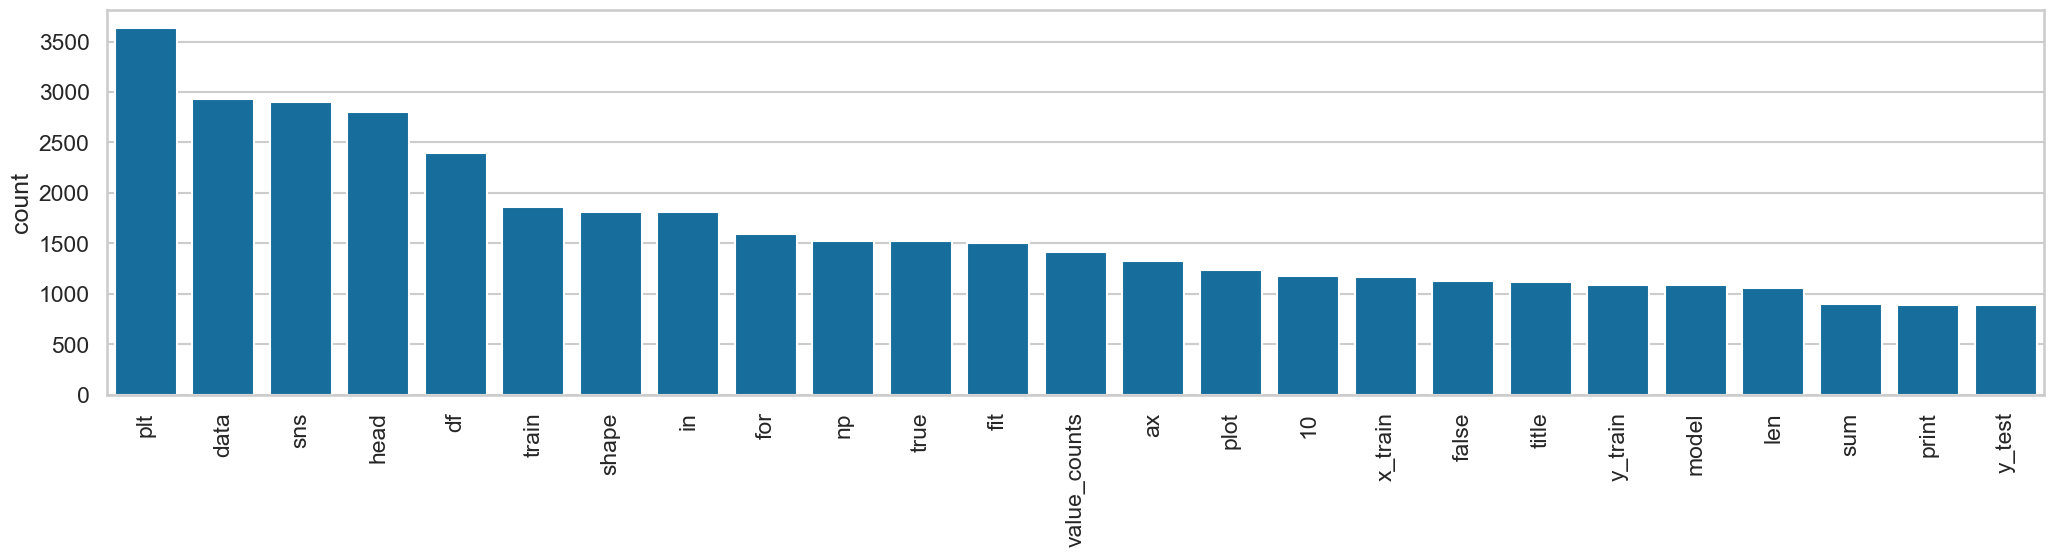

In [22]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(
    data=counts["count"].head(25),
    ax=ax,
)
ax.tick_params(axis='x', rotation=90)

In [23]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts["last_node"])
occurances = pd.DataFrame(
    data={"freq": X.toarray().max(axis=0)},
    index=vectorizer.get_feature_names_out(),
)
occurances = occurances.sort_values(by=["freq"], ascending=False)

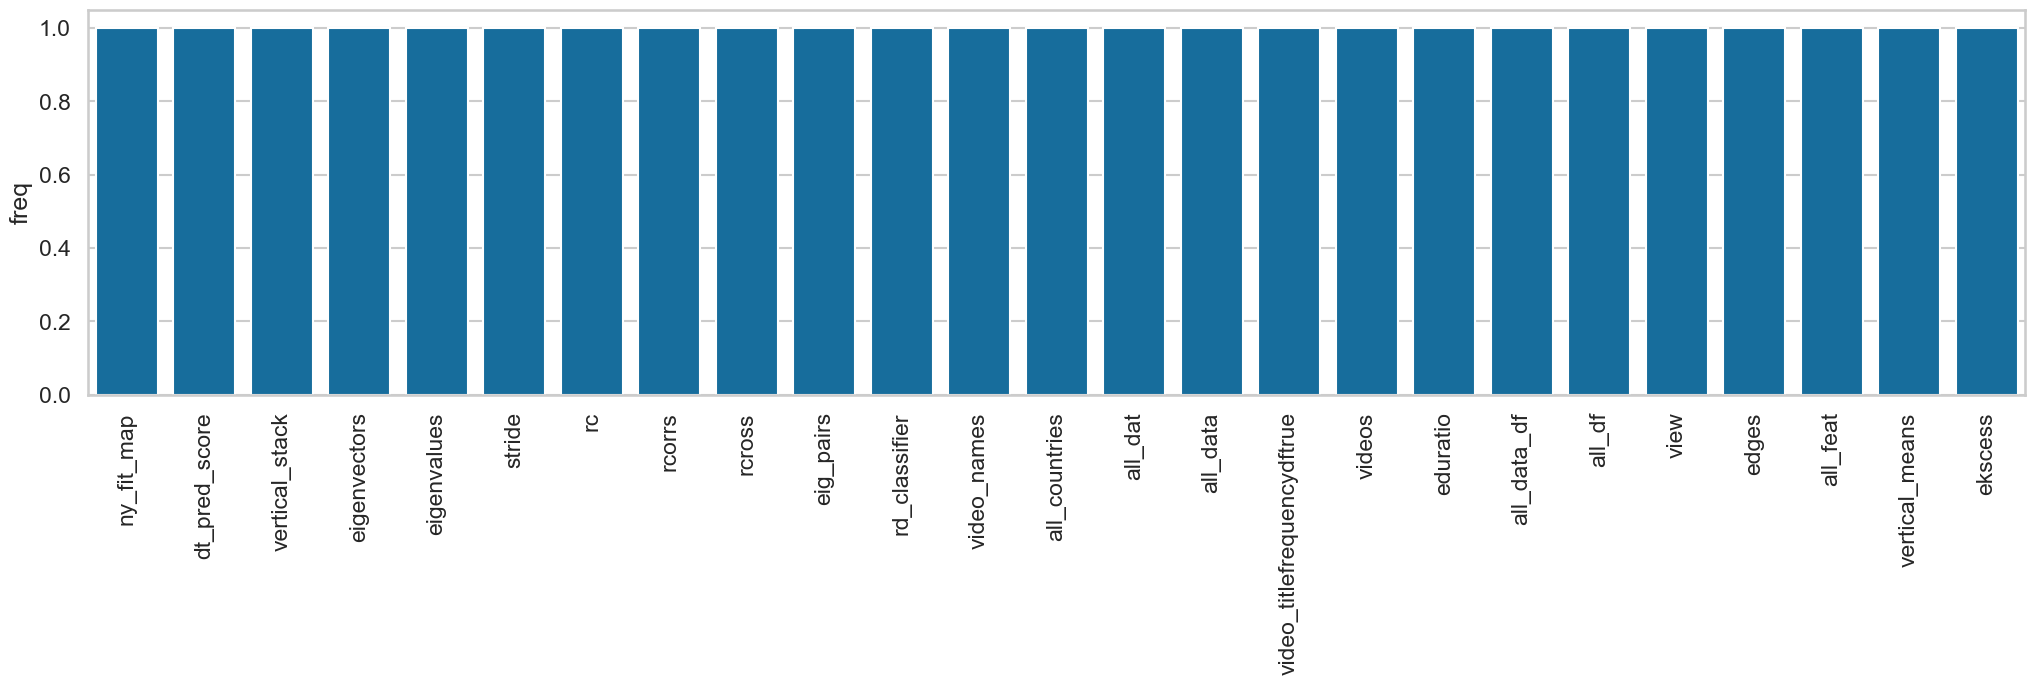

In [24]:
fig, ax = plt.subplots(figsize=(25,5))
sns.barplot(
    data=occurances["freq"].head(25),
    ax=ax,
)
ax.tick_params(axis='x', rotation=90)

In [26]:
texts.loc[:, "tokens"] = texts.loc[:, "last_node"].apply(vectorizer.build_analyzer())
texts.loc[:, "sum_freq"] = X.toarray().sum(axis=1) # sum all columns to get TF-IDF of all tokens in each asser
texts.loc[:, "max_freq"] = X.toarray().max(axis=1) # luis: take max TF-IDF of all tokens in assert
texts = texts.loc[texts["tokens"].map(lambda x: True if x else False)] # remove asserts without any tokens

In [27]:
texts.loc[:, "bin"] = pd.qcut(texts["sum_freq"], 4, labels=False)
texts["bin"].value_counts()

/var/folders/3_/dh2k952n2rld3_w3r369mln80000gn/T/ipykernel_36562/3414631874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts.loc[:, "bin"] = pd.qcut(texts["sum_freq"], 4, labels=False)


bin
0    7112
3    7109
2    7108
1    7106
Name: count, dtype: int64

In [28]:
for idx in texts["bin"].unique():
    texts.loc[texts["bin"] == idx].sample(100, random_state=42).to_csv(f"data/shome2023notebook/texts-quartile-{idx}.csv")